In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Leitura e Processamento dos dados 

In [2]:
dados = pd.read_csv('Passageiros.csv')

dados

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


### Distruição dos passageiros ao longo do tempo

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

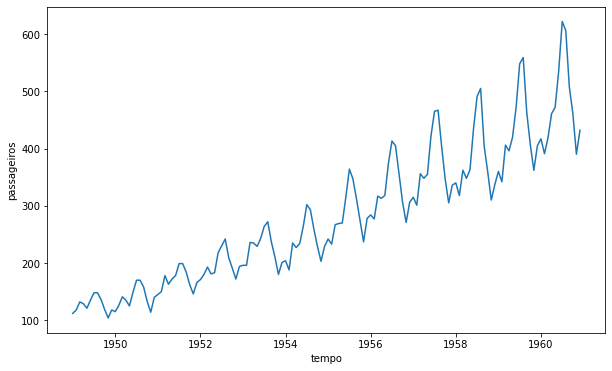

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dados, x="tempo", y="passageiros")

### Escalonamento dos dados para melhorar o aprendizado da rede

In [4]:
# Cria nosso escalonador
scaler = StandardScaler()
# Adapta o escalonador aos nossos dados
scaler.fit(dados)

# Transforma e cria um novo dataframe com os dados escalados
dados_scaler = scaler.transform(dados)

dados_scaler = pd.DataFrame(data=dados_scaler, columns=dados.columns)

dados_scaler.head()

,tempo,passageiros
0,-1.720064,-1.407779
1,-1.696007,-1.357590
2,-1.671950,-1.240483
3,-1.647894,-1.265578
4,-1.623837,-1.332496


#### Separação entre dados de treino e de teste

In [5]:
x = dados_scaler["tempo"]
y = dados_scaler["passageiros"]

#treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.1, random_state=8888)

treino_x = x[:-12]
teste_x = x[-12:]
treino_y = y[:-12]
teste_y = y[-12:]

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

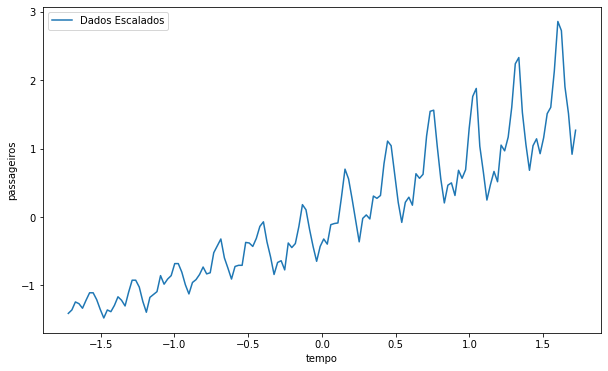

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(x=x, y=y, label="Dados Escalados")

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

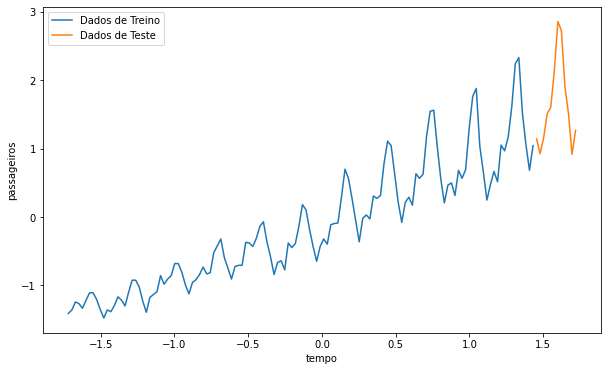

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(x=treino_x, y=treino_y, label="Dados de Treino")
sns.lineplot(x=teste_x, y=teste_y, label="Dados de Teste")

## Criação do Modelo de Previsão

In [8]:
regressor = Sequential()

regressor.add(Dense(1, input_dim=1, kernel_initializer="Ones", activation="linear", use_bias=False))

regressor.compile(loss="mean_squared_error", optimizer="adam")

In [9]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [10]:
regressor.fit(treino_x, treino_y)

5/5 [==============================] - 0s 994us/step - loss: 0.1183


In [11]:
predicao_y = regressor.predict(treino_x)

#### Análise do ajuste linear aos dados

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

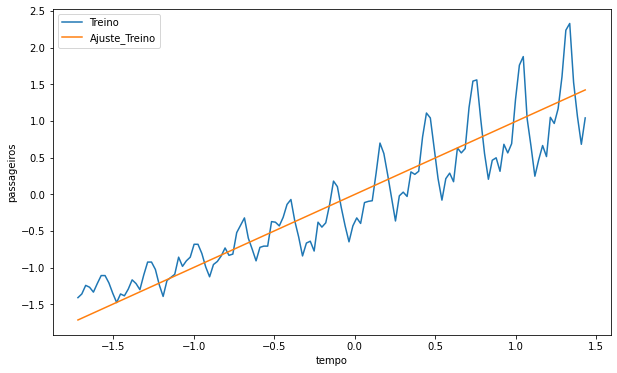

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x=treino_x, y=treino_y, label="Treino")
sns.lineplot(x=treino_x, y=predicao_y[:,0], label="Ajuste_Treino")

In [13]:
# Variável temporária para modificar os dados
d = {"tempo": treino_x, "passageiros" : predicao_y[:,0]}

resultados = pd.DataFrame(data=d)

resultados.head()

,tempo,passageiros
0,-1.720064,-1.712221
1,-1.696007,-1.688274
2,-1.671950,-1.664327
3,-1.647894,-1.640379
4,-1.623837,-1.616432


#### Transformação inversa dos dados escalonados

In [14]:
resultado_transf = scaler.inverse_transform(resultados)

resultado_transf = pd.DataFrame(resultado_transf, columns=resultados.columns)

resultado_transf

,tempo,passageiros
0,1949.000000,75.604243
1,1949.083333,78.467098
2,1949.166667,81.329967
3,1949.250000,84.192823
4,1949.333333,87.055678
...,...,...
127,1959.583333,439.187239
128,1959.666667,442.050109
129,1959.750000,444.912964
130,1959.833333,447.775819


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

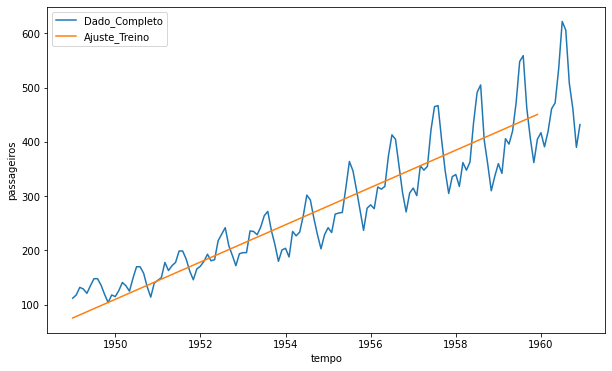

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x="tempo", y="passageiros", data=dados, label="Dado_Completo")
sns.lineplot(x="tempo", y="passageiros", data=resultado_transf, label="Ajuste_Treino")

#### Procedimento de verificação dos resultados do teste

In [16]:
predicao_y_teste = regressor.predict(teste_x)

d = {"tempo": teste_x, "passageiros" : predicao_y_teste[:,0]}

resultados_teste = pd.DataFrame(data=d)

resultado_transf_teste = scaler.inverse_transform(resultados_teste)

resultado_transf_teste = pd.DataFrame(resultado_transf_teste, columns=resultados_teste.columns)

resultado_transf_teste.head()

,tempo,passageiros
0,1960.000000,453.501529
1,1960.083333,456.364399
2,1960.166667,459.227254
3,1960.250000,462.090109
4,1960.333333,464.952964


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

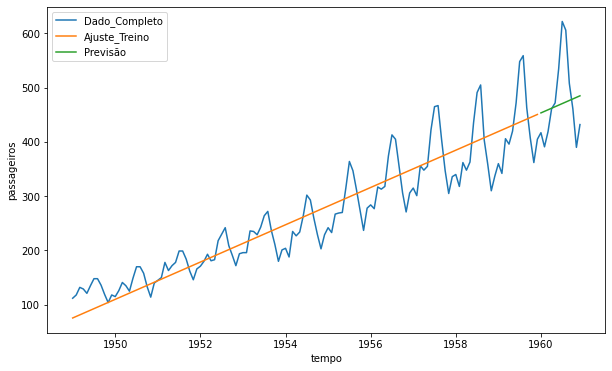

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x="tempo", y="passageiros", data=dados, label="Dado_Completo")
sns.lineplot(x="tempo", y="passageiros", data=resultado_transf, label="Ajuste_Treino")
sns.lineplot(x="tempo", y="passageiros", data=resultado_transf_teste, label="Previsão")

## Teste de um novo modelo de regressão

In [18]:
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(Dense(8, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(Dense(1, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))

regressor2.compile(loss="mean_squared_error", optimizer="RMSProp")

In [19]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(treino_x, treino_y, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1344
Epoch 2/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1808
Epoch 3/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9960
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1226
Epoch 5/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1559
Epoch 6/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1481
Epoch 7/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1705
Epoch 8/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.1192
Epoch 9/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0680
Epoch 10/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1051
Epoch 11/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1599
Epoch 12/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.1560
Epoch 13/2000
5/5 [==============================

5/5 [==============================] - 0s 1ms/step - loss: 0.7962
Epoch 103/2000
5/5 [==============================] - 0s 748us/step - loss: 0.8234
Epoch 104/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9250
Epoch 105/2000
5/5 [==============================] - 0s 748us/step - loss: 0.7692
Epoch 106/2000
5/5 [==============================] - 0s 998us/step - loss: 0.8518
Epoch 107/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8980
Epoch 108/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8304
Epoch 109/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7734
Epoch 110/2000
5/5 [==============================] - 0s 998us/step - loss: 0.8423
Epoch 111/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8187
Epoch 112/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8621
Epoch 113/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7829
Epoch 114/2000
5/5 [=========

5/5 [==============================] - 0s 997us/step - loss: 0.8494
Epoch 202/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7797
Epoch 203/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8308
Epoch 204/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8971
Epoch 205/2000
5/5 [==============================] - 0s 998us/step - loss: 0.8286
Epoch 206/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7782
Epoch 207/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7739
Epoch 208/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8080
Epoch 209/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8306
Epoch 210/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7590
Epoch 211/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8134
Epoch 212/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7787
Epoch 213/2000
5/5 [=======

Epoch 300/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8224
Epoch 301/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7644
Epoch 302/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8495
Epoch 303/2000
5/5 [==============================] - 0s 748us/step - loss: 0.8219
Epoch 304/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7947
Epoch 305/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8330
Epoch 306/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7650
Epoch 307/2000
5/5 [==============================] - 0s 748us/step - loss: 0.7958
Epoch 308/2000
5/5 [==============================] - 0s 748us/step - loss: 0.8295
Epoch 309/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7509
Epoch 310/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7987
Epoch 311/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7807
Epoch 312/2000

5/5 [==============================] - 0s 1ms/step - loss: 0.8114
Epoch 400/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7757
Epoch 401/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7539
Epoch 402/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8234
Epoch 403/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7690
Epoch 404/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8533
Epoch 405/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8450
Epoch 406/2000
5/5 [==============================] - ETA: 0s - loss: 0.685 - 0s 1ms/step - loss: 0.7381
Epoch 407/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8171
Epoch 408/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8012
Epoch 409/2000
5/5 [==============================] - 0s 998us/step - loss: 0.8331
Epoch 410/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7792
Epoch 4

5/5 [==============================] - 0s 997us/step - loss: 0.7991
Epoch 499/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8332
Epoch 500/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7570
Epoch 501/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7839
Epoch 502/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7467
Epoch 503/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7401
Epoch 504/2000
5/5 [==============================] - 0s 748us/step - loss: 0.8125
Epoch 505/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7949
Epoch 506/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7066
Epoch 507/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7986
Epoch 508/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7461
Epoch 509/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7593
Epoch 510/2000
5/5 [=========

5/5 [==============================] - 0s 997us/step - loss: 0.8162
Epoch 598/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7318
Epoch 599/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7030
Epoch 600/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7772
Epoch 601/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7539
Epoch 602/2000
5/5 [==============================] - 0s 748us/step - loss: 0.6874
Epoch 603/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7720
Epoch 604/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7281
Epoch 605/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7720
Epoch 606/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7262
Epoch 607/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7623
Epoch 608/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7758
Epoch 609/2000
5/5 [=========

5/5 [==============================] - 0s 997us/step - loss: 0.7633
Epoch 697/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7624
Epoch 698/2000
5/5 [==============================] - 0s 998us/step - loss: 0.7601
Epoch 699/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7508
Epoch 700/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7278
Epoch 701/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7965
Epoch 702/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8168
Epoch 703/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8234
Epoch 704/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8013
Epoch 705/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7399
Epoch 706/2000
5/5 [==============================] - 0s 748us/step - loss: 0.7183
Epoch 707/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7568
Epoch 708/2000
5/5 [=====

Epoch 796/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7947
Epoch 797/2000
5/5 [==============================] - ETA: 0s - loss: 0.614 - 0s 998us/step - loss: 0.7522
Epoch 798/2000
5/5 [==============================] - 0s 748us/step - loss: 0.7665
Epoch 799/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7855
Epoch 800/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7896
Epoch 801/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7676
Epoch 802/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7751
Epoch 803/2000
5/5 [==============================] - 0s 998us/step - loss: 0.7674
Epoch 804/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7809
Epoch 805/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7255
Epoch 806/2000
5/5 [==============================] - 0s 748us/step - loss: 0.7656
Epoch 807/2000
5/5 [==============================] - 0s 998us/step

5/5 [==============================] - 0s 997us/step - loss: 0.7059
Epoch 896/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7344
Epoch 897/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7252
Epoch 898/2000
5/5 [==============================] - 0s 998us/step - loss: 0.7174
Epoch 899/2000
5/5 [==============================] - ETA: 0s - loss: 0.540 - 0s 1ms/step - loss: 0.7281
Epoch 900/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.7766
Epoch 901/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7271
Epoch 902/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7903
Epoch 903/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7244
Epoch 904/2000
5/5 [==============================] - 0s 998us/step - loss: 0.7495
Epoch 905/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7644
Epoch 906/2000
5/5 [==============================] - 0s 997us/step - loss: 0.6885
E

5/5 [==============================] - 0s 1ms/step - loss: 0.7857
Epoch 995/2000
5/5 [==============================] - 0s 748us/step - loss: 0.8178
Epoch 996/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7182
Epoch 997/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7277
Epoch 998/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7942
Epoch 999/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7835
Epoch 1000/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8011
Epoch 1001/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7888
Epoch 1002/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7424
Epoch 1003/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7424
Epoch 1004/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7905
Epoch 1005/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7960
Epoch 1006/2000
5/5 [==

5/5 [==============================] - 0s 1ms/step - loss: 0.7319
Epoch 1093/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7832
Epoch 1094/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7602
Epoch 1095/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7776
Epoch 1096/2000
5/5 [==============================] - 0s 997us/step - loss: 0.8291
Epoch 1097/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7428
Epoch 1098/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8104
Epoch 1099/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7749
Epoch 1100/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.8246
Epoch 1101/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7708
Epoch 1102/2000
5/5 [==============================] - 0s 997us/step - loss: 0.7331
Epoch 1103/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7920
Epoch 1104/2000
5/5 

In [ ]:
predicao_y = regressor2.predict(treino_x)
predicao_y_teste = regressor2.predict(teste_x)

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=treino_x, y=treino_y, label="Treino")
sns.lineplot(x=teste_x, y=teste_y, label="Teste")
sns.lineplot(x=treino_x, y=predicao_y[:,0], label="Ajuste_Treino")
sns.lineplot(x=teste_x, y=predicao_y_teste[:,0], label="Predição")

## Reformulando o problema

In [ ]:
vetor = pd.DataFrame(treino_y)

In [ ]:
def separa_vetor(vetor, n_passos):
    x_novo, y_novo = [], []
    
    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos]))
        y_novo.append(vetor.loc[i])
        
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    
    return x_novo, y_novo

In [ ]:
treino_x_novo, treino_y_novo = separa_vetor(vetor, 1)

display(treino_x_novo[:5])
display(treino_y_novo[:5])